# Tarea 3. Gabriel Molina (201273575-0) | Ignacio Norambuena (201373567-3)
## 1. Small Circle inside Large Circle

In [3]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.decomposition import KernelPCA

### (a) Escriba una función que genere (aleatoriamente) n datos etiquetados de la forma {(x1 , y1 ), . . . , (xn , yn )}, xi ∈ R2, yi ∈ {0,1}, con una distribución de probabilidad que refleje la configuración linealmente inseparable que muestra la Fig. 13. Utilice esta función para crear 1000 datos de entrenamiento y 1000 datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un 5% de ruido al dataset, generando x’s cercanos a la frontera. Genere un gráfico que muestre datos de entrenamiento y pruebas, identificando cada clase con un color diferente (como lo muestra la Fig. 1).

In [4]:
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x), np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: 
        raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()

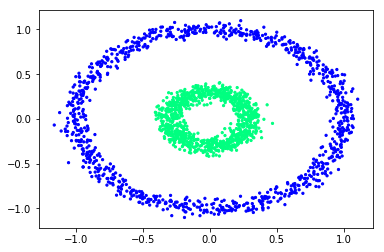

In [17]:
X_train,Y_train,X_test,Y_test = do_circles()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((Y_train,Y_test),axis=0)
plt.scatter(X[:,0], X[:,1], s=5, c=y, cmap=plt.cm.winter)
plt.show()

### (b) Demuestre experimentalmente que una red neuronal artificial correspondiente a 1 sola neurona (i.e. sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la función de activación y el método de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar los parámetros de la máquina de aprendizaje, reportando métricas que permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también la función plot classifier para que represente gráficamente la solución encontrada por la red neuronal. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

  32/1000 [..............................] - ETA: 0s

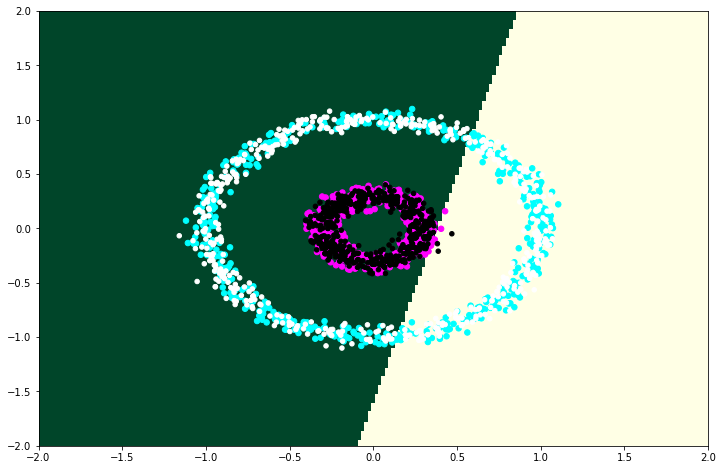

In [6]:
n_h=1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)

scores = model.evaluate(X_train, Y_train)
train_acc = scores[1]
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

  32/1000 [..............................] - ETA: 0s

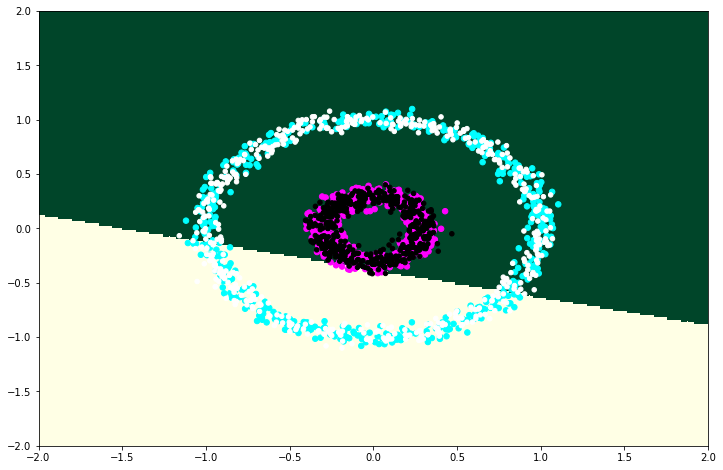

In [8]:
n_h=1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, kernel_initializer='uniform', activation='softplus'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)

scores = model.evaluate(X_train, Y_train)
train_acc = scores[1]
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

  32/1000 [..............................] - ETA: 0s

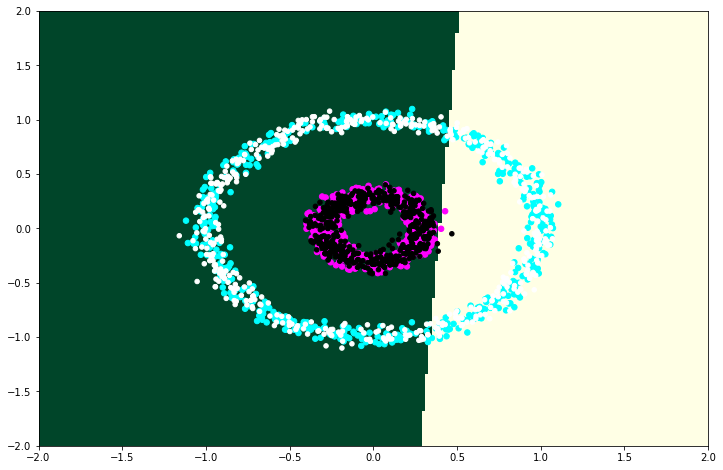

In [9]:
n_h=1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=150, batch_size=100, verbose=0)

scores = model.evaluate(X_train, Y_train)
train_acc = scores[1]
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

#### Respuesta

Se probaron 3 funciones de activación diferentes, de las cuales ninguna fue capaz de separar las clases de forma satisfactoria. Adicionalemnte, se hizo un intento aumentando el número de epochs con la función de activación incial, la sigmoidal, pasando de 50 epochs a 150. Los resultados mejoraron de forma marginal, por lo que no se considera que estos tengan una influencia en el resultado.

Dado lo anterior, se concluye empíricamente que no se pueden separar usando una sola neurona. Esto se debe a que una neurona es una combinacion lineal de pesos y entradas, es decir, una recta, haciendo imposible la separación de las clases.

### (c) Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de neuronas Nh en la red entre 2 y 32 en potencias de 2, graficando el error de entrenamiento y pruebas como función de Nh. Describa y explique lo que observa. Utilice la función plot classifier, diseñada anteriormente, para construir gráficos de la solución en algunos casos representativos.

In [10]:
def one_layer(model, X_train, Y_train, X_test, Y_test, af):
    nn = [2**x for x in range(1, 6)]
    ann_error_train = []
    ann_error_test = []
    
    for n_h in nn:
        model = Sequential()
        model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dense(1, kernel_initializer='uniform', activation=af))
        model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
        
        scores = model.evaluate(X_train, Y_train)
        train_acc = scores[1]
        
        scores = model.evaluate(X_test, Y_test)
        test_acc = scores[1]
    
        print(" %s n_h: %d Train Acc: %f  Test Acc: %f" % (af, n_h, train_acc, test_acc))
        ann_error_train.append(1 - train_acc)
        ann_error_test.append(1 - test_acc)
        plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')
    
    
    plt.plot(nn, ann_error_train, 'go--', label='Train Error')
    plt.plot(nn, ann_error_test, 'go-', label= 'Test Error')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.title('Error vs Neuronas | ' + af, y=1.08)
    plt.xlabel('Neuronas')
    plt.ylabel('Error')
    plt.show()

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 2 Train Acc: 0.889000  Test Acc: 0.854000


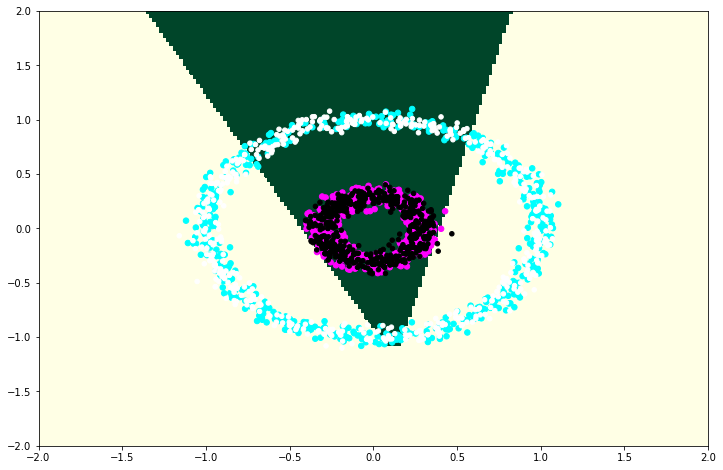

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 4 Train Acc: 1.000000  Test Acc: 1.000000


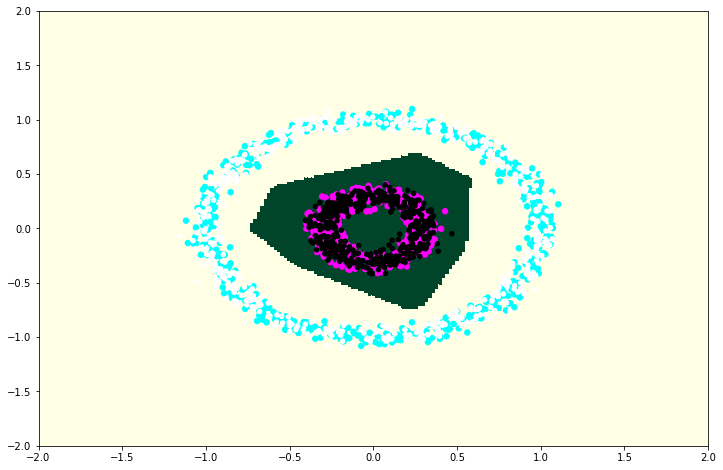

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 8 Train Acc: 1.000000  Test Acc: 1.000000


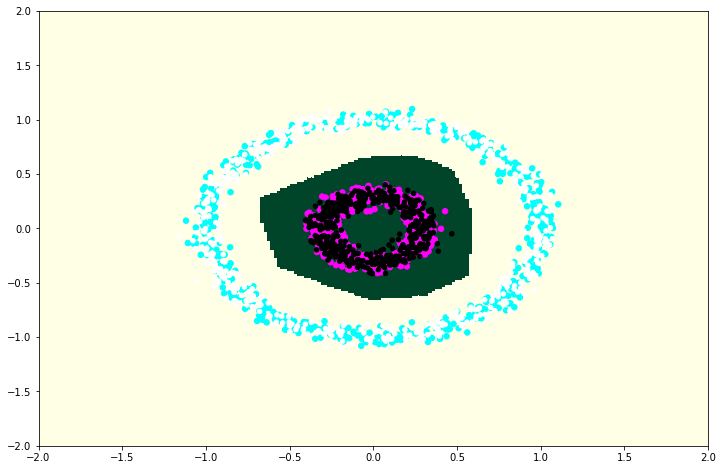

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 16 Train Acc: 1.000000  Test Acc: 1.000000


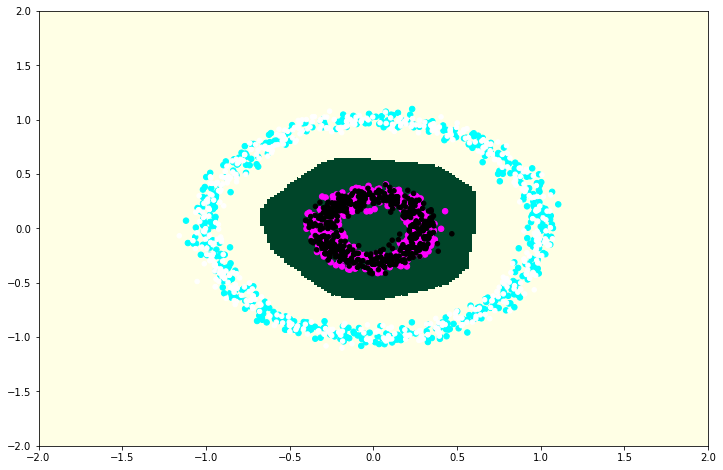

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 32 Train Acc: 1.000000  Test Acc: 1.000000


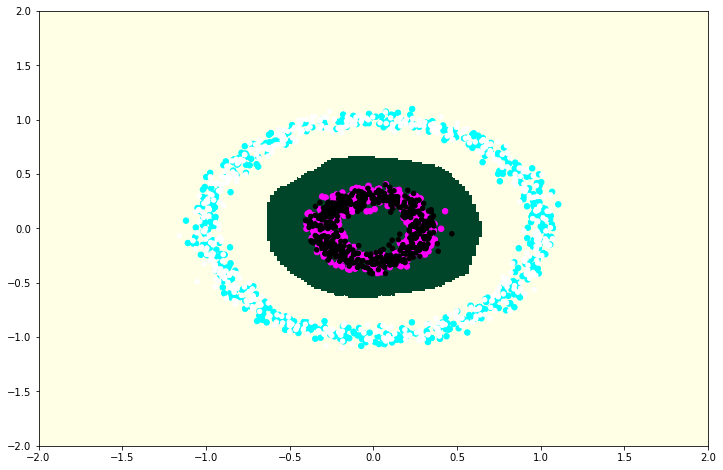

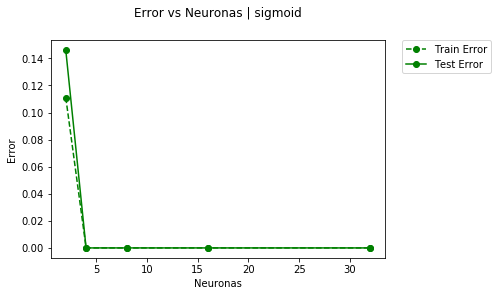

  32/1000 [..............................] - ETA: 0s softplus n_h: 2 Train Acc: 0.507000  Test Acc: 0.493000


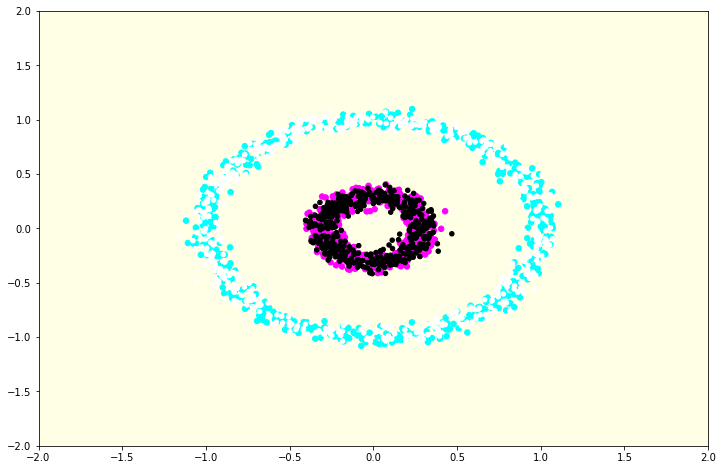

  32/1000 [..............................] - ETA: 0s softplus n_h: 4 Train Acc: 0.568000  Test Acc: 0.574000


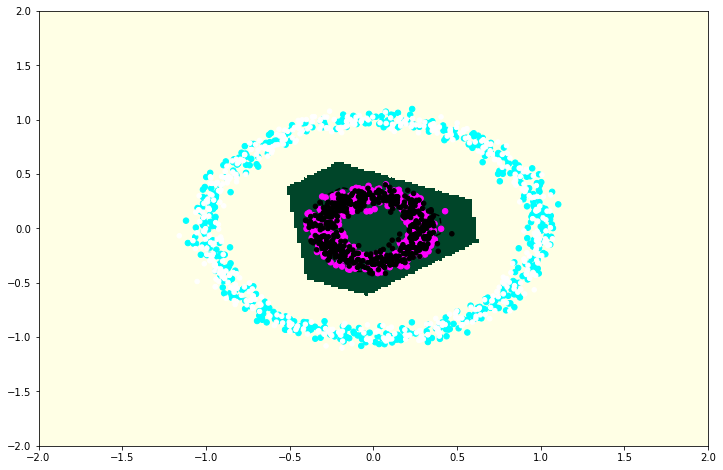

  32/1000 [..............................] - ETA: 0s softplus n_h: 8 Train Acc: 0.557000  Test Acc: 0.576000


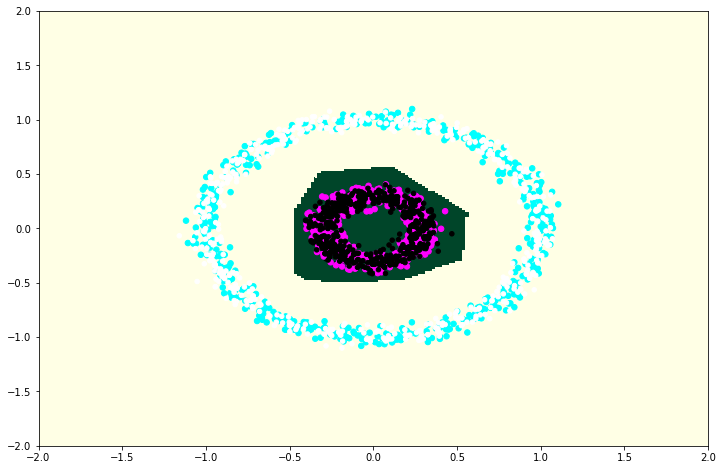

  32/1000 [..............................] - ETA: 0s softplus n_h: 16 Train Acc: 0.610000  Test Acc: 0.617000


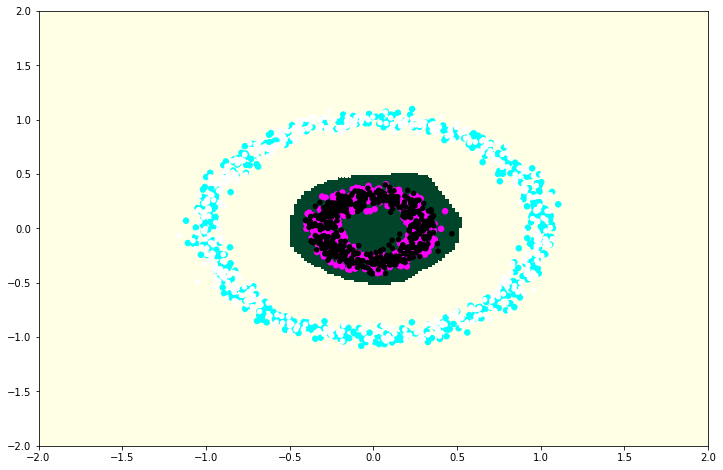

  32/1000 [..............................] - ETA: 0s softplus n_h: 32 Train Acc: 0.629000  Test Acc: 0.644000


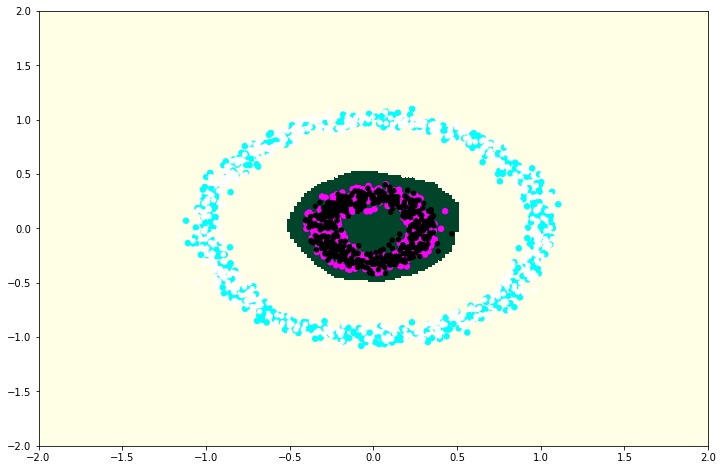

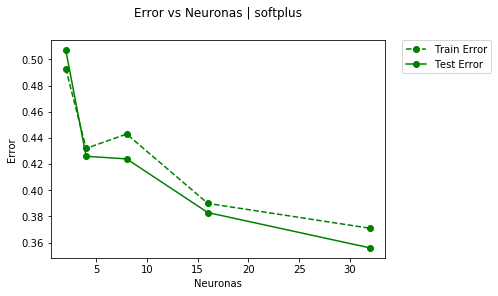

In [11]:
one_layer(model, X_train, Y_train, X_test, Y_test, 'sigmoid')
one_layer(model, X_train, Y_train, X_test, Y_test, 'softplus')

#### Respuesta

Se observa que la función sigmoidal es posible lograr un accuracy del 100%, sin embargo usando otras funciones de activación no se logra el mismo resultado. Se puede ver que con la Softplus parte bien, luego empeora mucho y comienza a mejorar de nuevo, mientras que la Softmax no aprende.

### (d) Demuestre experimentalmente que stump (árbol de clasificación de 1 nivel) no puede resolver satisfactoriamente el problema anterior. Puede utilizar el criterio y la función de partición que prefiera. Sea convincente: por ejemplo, intente modificar los parámetros de la máquina, reportando métricas que permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también la función plot classifier para que represente gráficamente la solución encontrada por el árbol. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

Test Accuracy = 0.670000
1


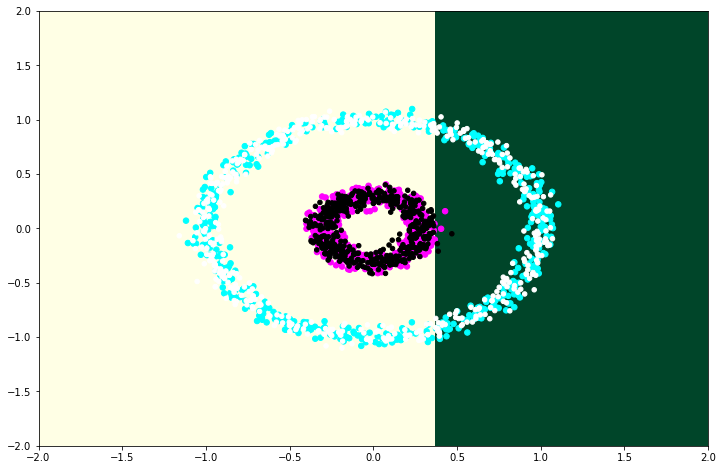

Test Accuracy = 0.658000
1


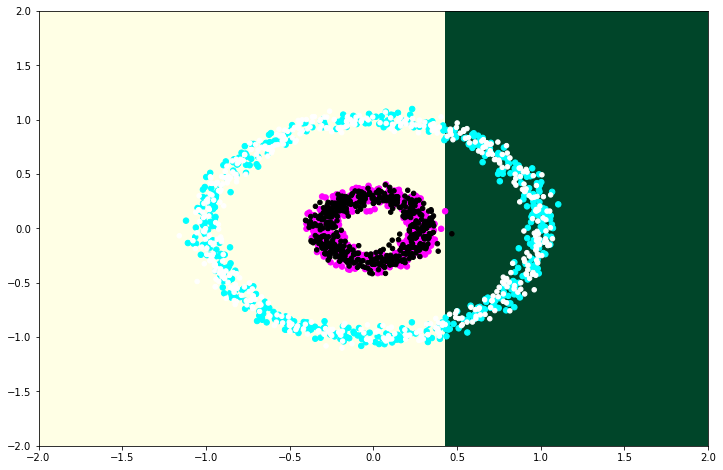

Test Accuracy = 0.679000
1


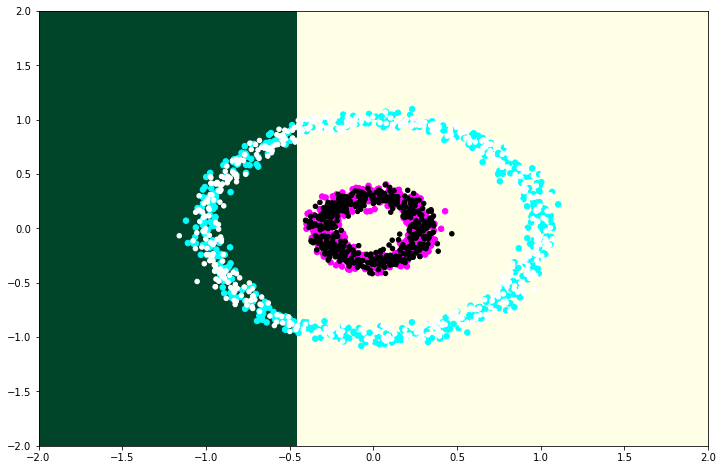

Test Accuracy = 0.679000
1


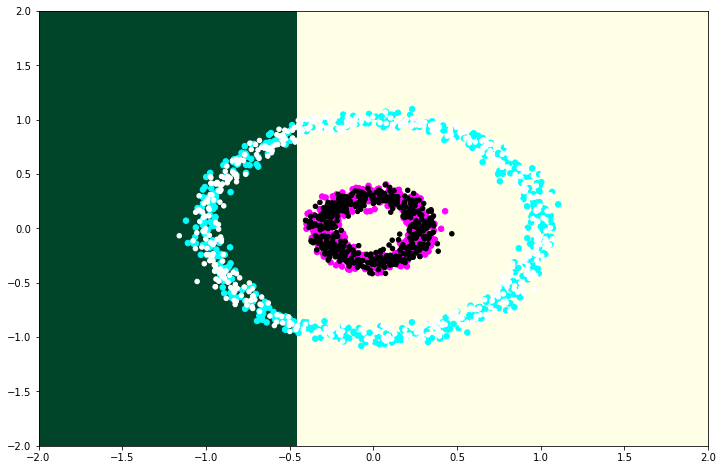

In [12]:
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print("Test Accuracy = %f"%acc_test)
print(clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')
clf=Tree(criterion='entropy',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print("Test Accuracy = %f"%acc_test)
print(clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')
clf=Tree(criterion='gini',splitter='random',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print("Test Accuracy = %f"%acc_test)
print(clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')
clf=Tree(criterion='entropy',splitter='random',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print("Test Accuracy = %f"%acc_test)
print(clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

#### Respuesta

Se probó usando critero gini y entropy, admeás de splitter random y best. En ningun caso se logró separar correctamente las clases.

Lo anterior se debe a que los árboles dividen de forma horizontal o vertical en cada iteración. Dado esto es imposible que estas clases sean clasificadas correctamente. ya que se requieren minimo 3 lineas para separar las clases. En el caso de los arboles, al ser separaciones horizontales o verticales, se requieren como mínimo 4 lineas.

### (e) Demuestre experimentalmente que un árbol de clasificación de múltiples niveles puede resolver satisfactoriamente el problema estudiado. Puede utilizar el criterio y la función de partición que prefiera, pero puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de niveles admitidos en el árbol Nt entre 2 y 20, graficando el error de entrenamiento y pruebas como función de Nt. Describa y explique lo que observa. Utilice la función plot classifier, diseñada anteriormente, para construir gráficos de la solución en algunos casos representativos.

In [13]:
def multiple_tree(model, X_train, Y_train, X_test, Y_test, c):
    nn = range(1, 20)
    ann_error_train = []
    ann_error_test = []
    
    for d in nn:
        clf=Tree(criterion=c,splitter='best',random_state=0,max_depth=d)
        clf.fit(X_train,Y_train)
        if (d < 6):
            plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')
    
        scores = clf.score(X_train,Y_train)
        train_acc = scores
        
        scores = clf.score(X_test, Y_test)
        test_acc = scores
        
        ann_error_train.append(1 - train_acc)
        ann_error_test.append(1 - test_acc)
        print(" %s divitions: %d Train Acc: %f  Test Acc: %f" % (c, d, train_acc, test_acc))
    
    
    plt.plot(nn, ann_error_train, 'go--', label='Train Error')
    plt.plot(nn, ann_error_test, 'go-', label= 'Test Error')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.title('Error vs Divitions | ' + c, y=1.08)
    plt.xlabel('Divisiones')
    plt.ylabel('Error')
    plt.show()

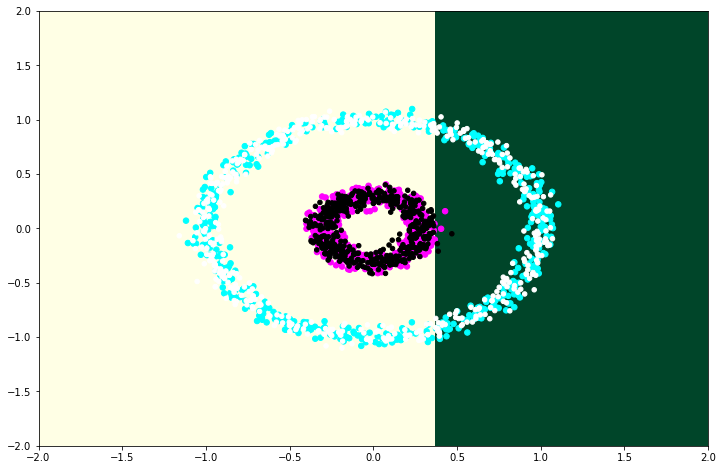

 gini divitions: 1 Train Acc: 0.705000  Test Acc: 0.670000


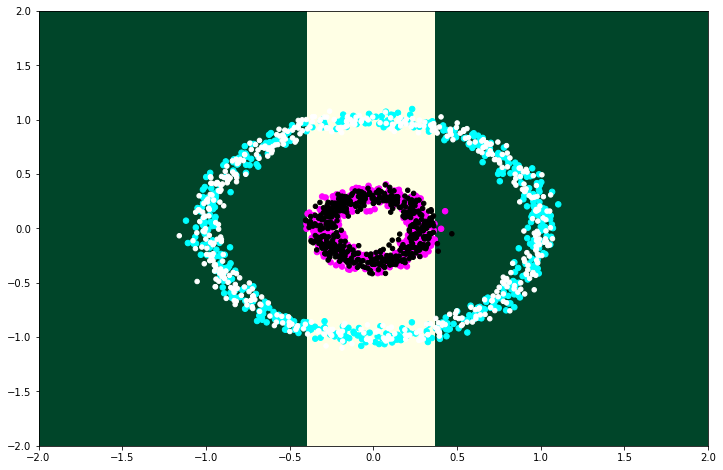

 gini divitions: 2 Train Acc: 0.881000  Test Acc: 0.867000


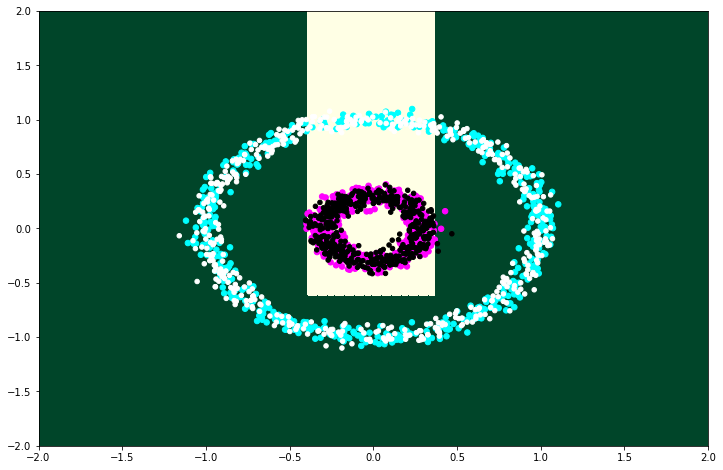

 gini divitions: 3 Train Acc: 0.944000  Test Acc: 0.924000


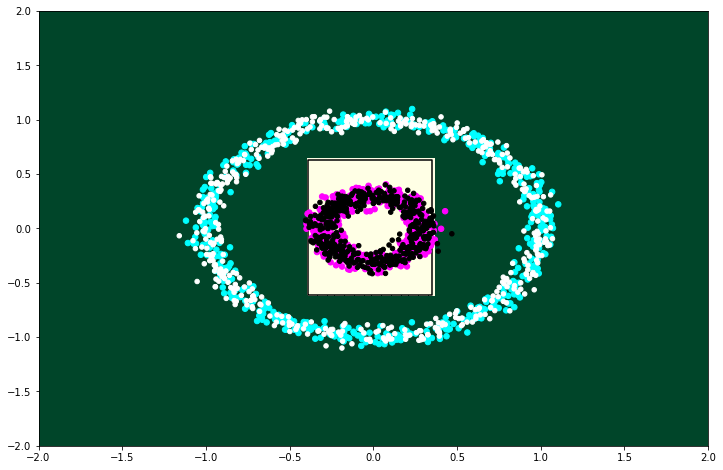

 gini divitions: 4 Train Acc: 0.999000  Test Acc: 0.994000


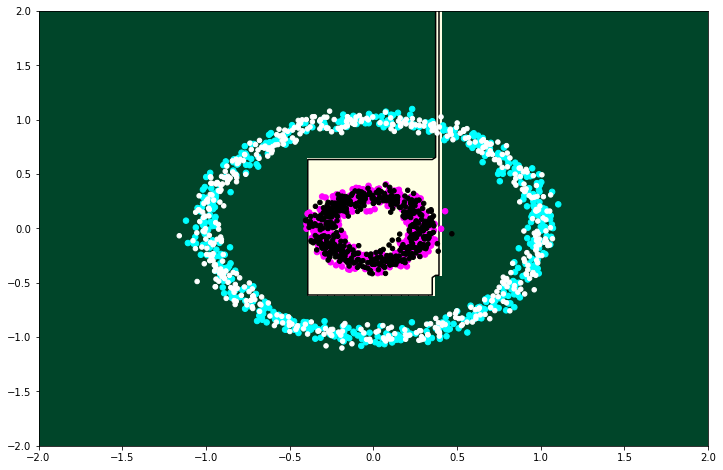

 gini divitions: 5 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 6 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 7 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 8 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 9 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 10 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 11 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 12 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 13 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 14 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 15 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 16 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 17 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 18 Train Acc: 1.000000  Test Acc: 0.992000
 gini divitions: 19 Train Acc: 1.000000  Test Acc: 0.992000


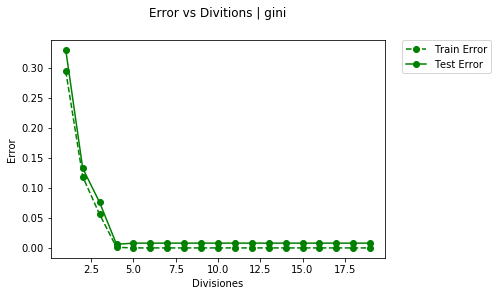

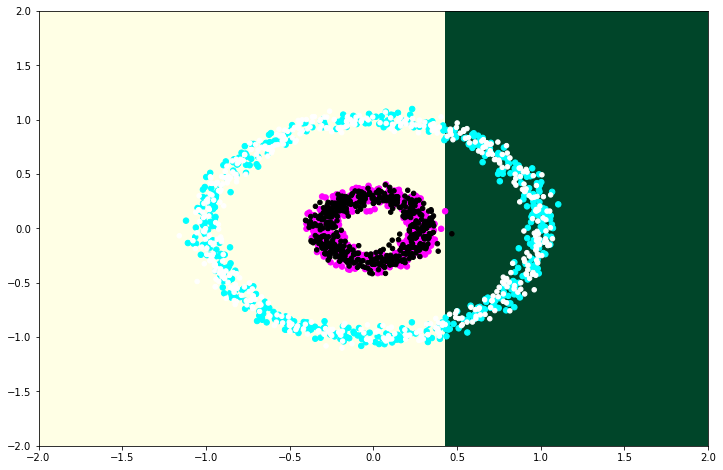

 entropy divitions: 1 Train Acc: 0.697000  Test Acc: 0.658000


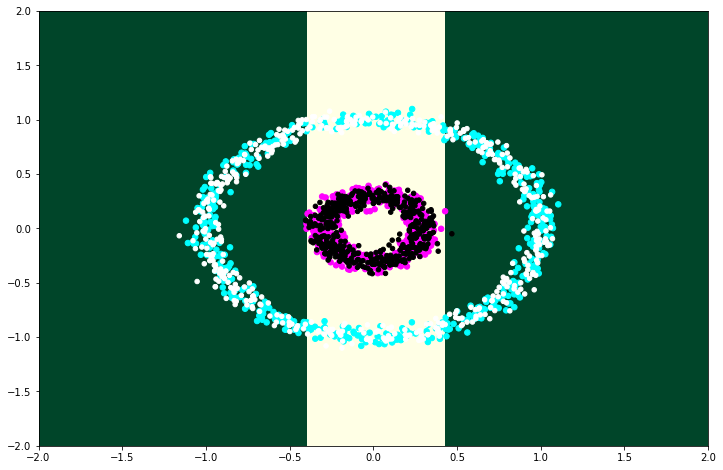

 entropy divitions: 2 Train Acc: 0.873000  Test Acc: 0.855000


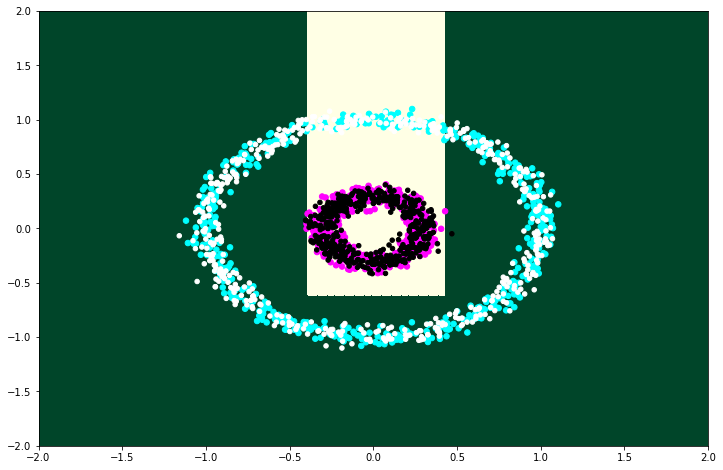

 entropy divitions: 3 Train Acc: 0.942000  Test Acc: 0.923000


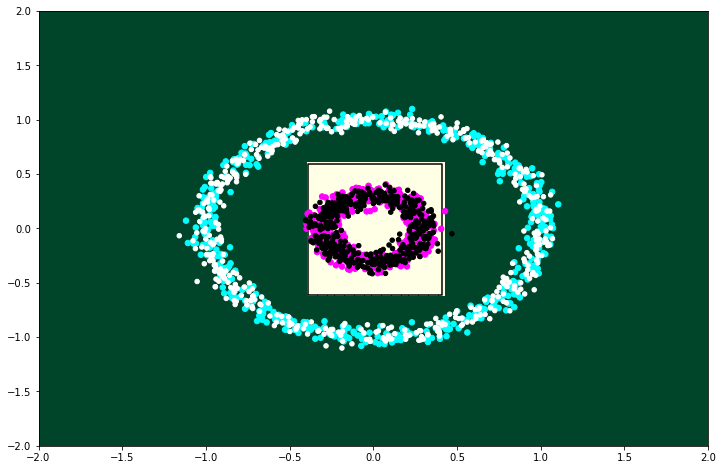

 entropy divitions: 4 Train Acc: 1.000000  Test Acc: 0.997000


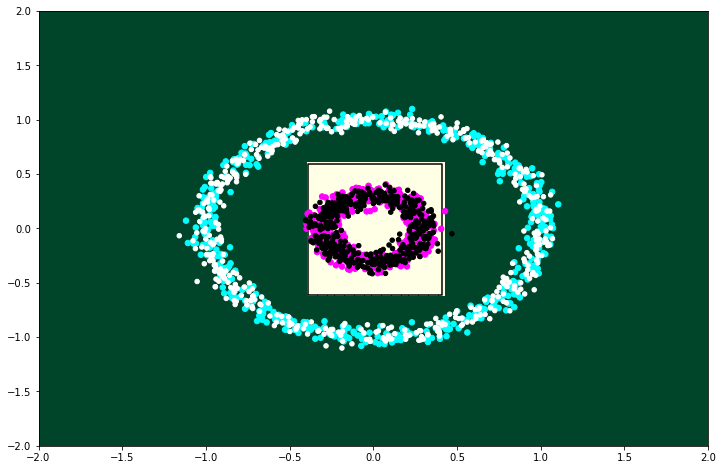

 entropy divitions: 5 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 6 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 7 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 8 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 9 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 10 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 11 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 12 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 13 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 14 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 15 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 16 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 17 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 18 Train Acc: 1.000000  Test Acc: 0.997000
 entropy divitions: 19 Train Acc: 1.000000  Test Acc: 0.997000


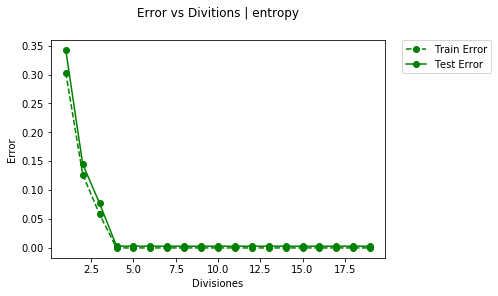

In [14]:
multiple_tree(clf, X_train, Y_train, X_test, Y_test, 'gini')
multiple_tree(clf, X_train, Y_train, X_test, Y_test, 'entropy')

#### Respuesta

Se observa que para ambos criterios, entropy y gini, el error se disminuye de forma notable hasta 4 divisiones. Luego de esto, es inutil continuar pues se comienzan a agregar divisiones extras aumentando el overfitting.

### (f) Como ya se demostró experimentalmente que este problema es linealmente inseperable, ahora se pide experimentar otra alternativa. Para ello debería realizar una proyección de los datos a un nuevo espacio dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con fronteras lineales. Utilice la técnica de PCA con la ayuda de un Kernel Gaussiano ([2]) para extraer sus vectores con dimensión infinita de mayor varianza.

In [15]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

### (g) Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio que captura sus componentes no lineales, muestre gráficamente que el problema ahora puede ser resulto con estos métodos. Reporte métricas para evaluar el desempeño, comente y concluya.

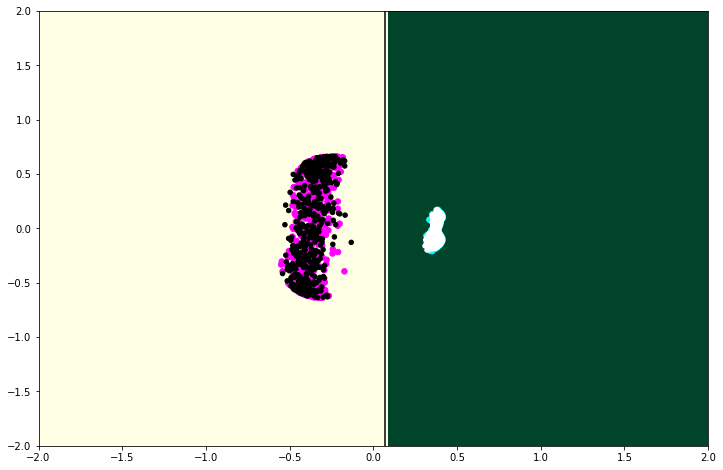

 gini divitions: 1 Train Acc: 1.000000  Test Acc: 1.000000


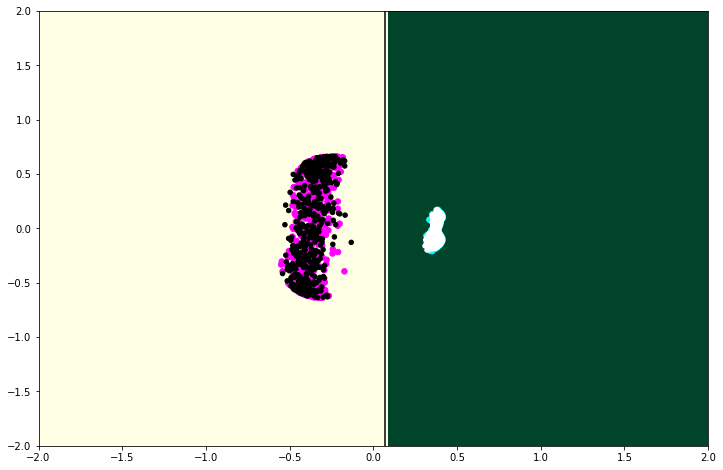

 gini divitions: 2 Train Acc: 1.000000  Test Acc: 1.000000


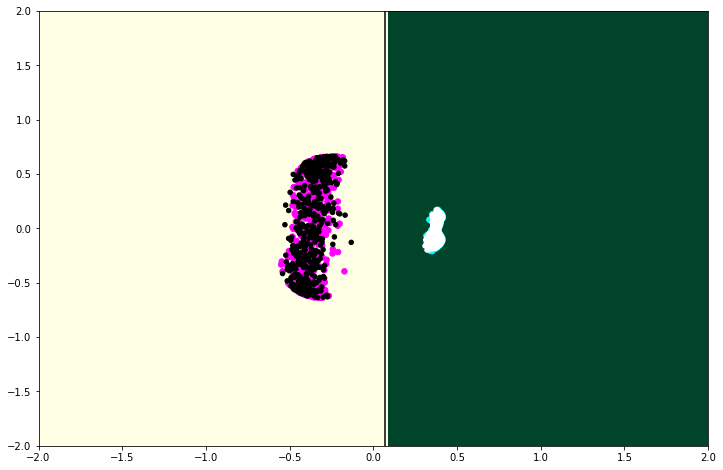

 gini divitions: 3 Train Acc: 1.000000  Test Acc: 1.000000


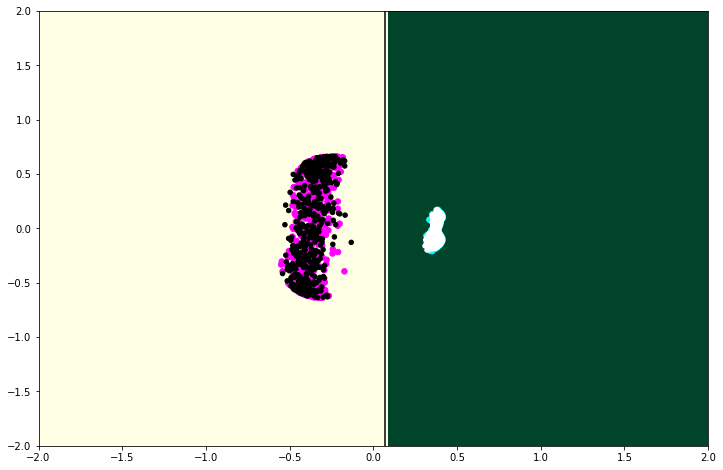

 gini divitions: 4 Train Acc: 1.000000  Test Acc: 1.000000


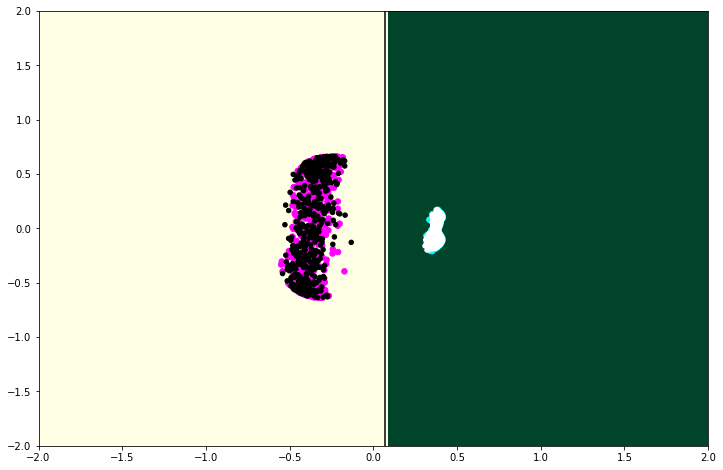

 gini divitions: 5 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 6 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 7 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 8 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 9 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 10 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 11 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 12 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 13 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 14 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 15 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 16 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 17 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 18 Train Acc: 1.000000  Test Acc: 1.000000
 gini divitions: 19 Train Acc: 1.000000  Test Acc: 1.000000


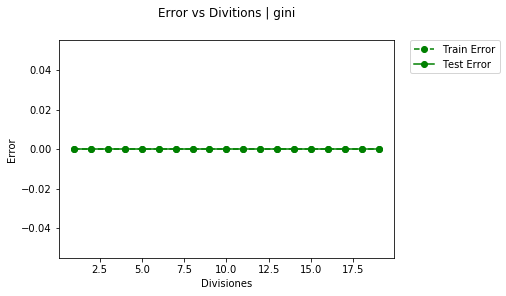

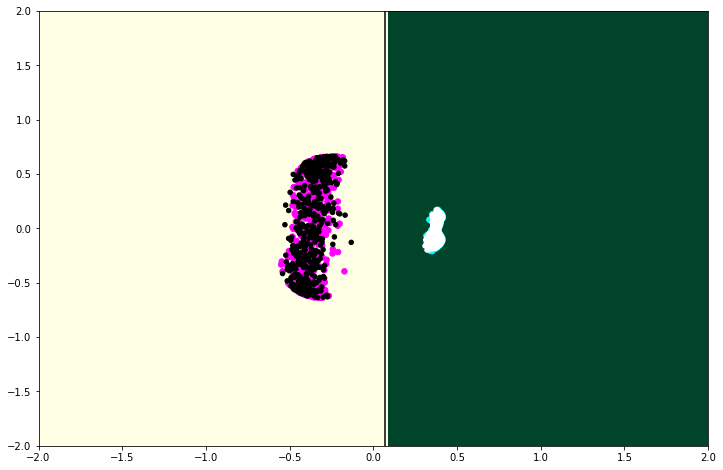

 entropy divitions: 1 Train Acc: 1.000000  Test Acc: 1.000000


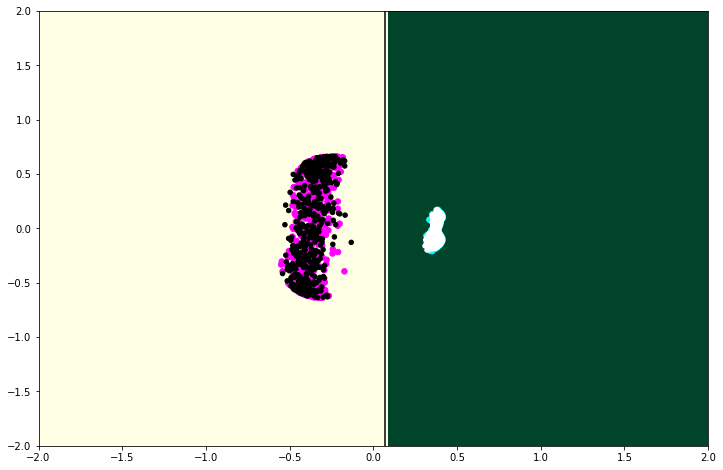

 entropy divitions: 2 Train Acc: 1.000000  Test Acc: 1.000000


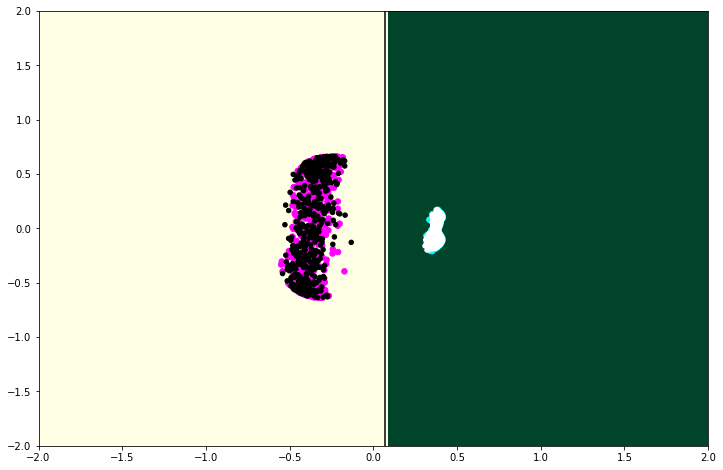

 entropy divitions: 3 Train Acc: 1.000000  Test Acc: 1.000000


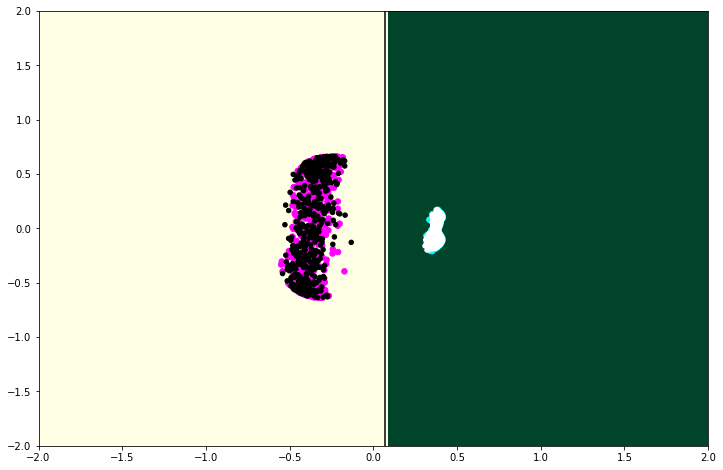

 entropy divitions: 4 Train Acc: 1.000000  Test Acc: 1.000000


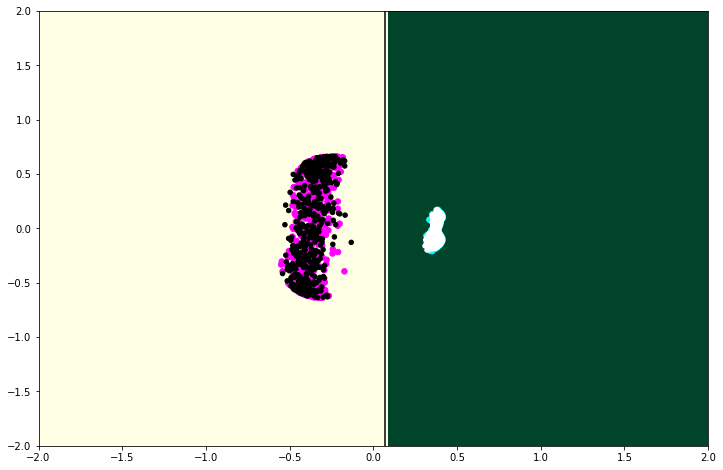

 entropy divitions: 5 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 6 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 7 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 8 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 9 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 10 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 11 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 12 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 13 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 14 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 15 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 16 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 17 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 18 Train Acc: 1.000000  Test Acc: 1.000000
 entropy divitions: 19 Train Acc: 1.000000  Test Acc: 1.000000


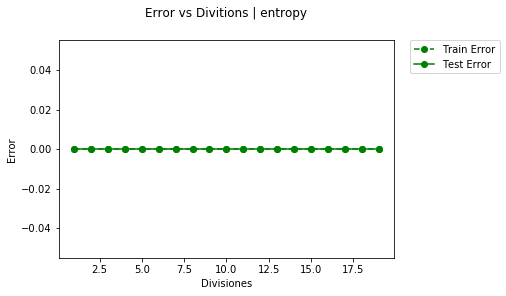

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 2 Train Acc: 1.000000  Test Acc: 1.000000


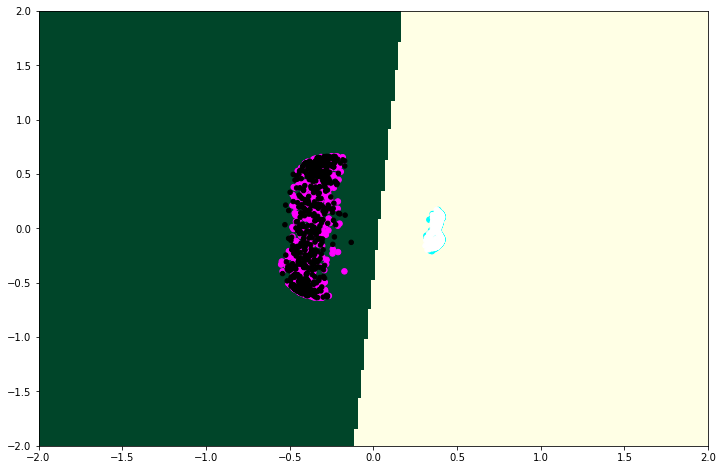

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 4 Train Acc: 1.000000  Test Acc: 1.000000


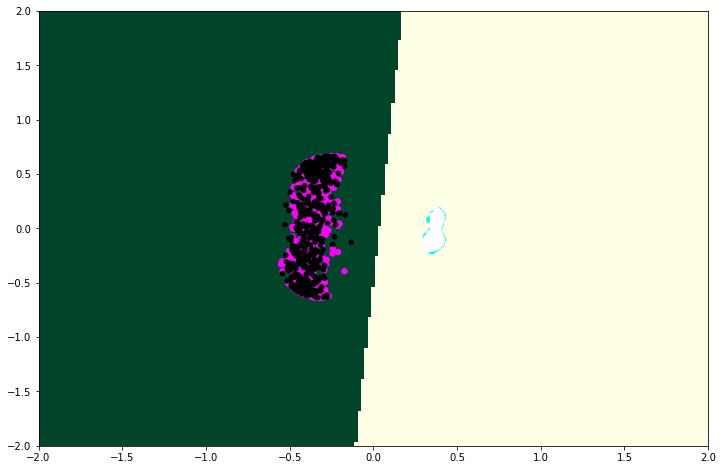

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 8 Train Acc: 1.000000  Test Acc: 1.000000


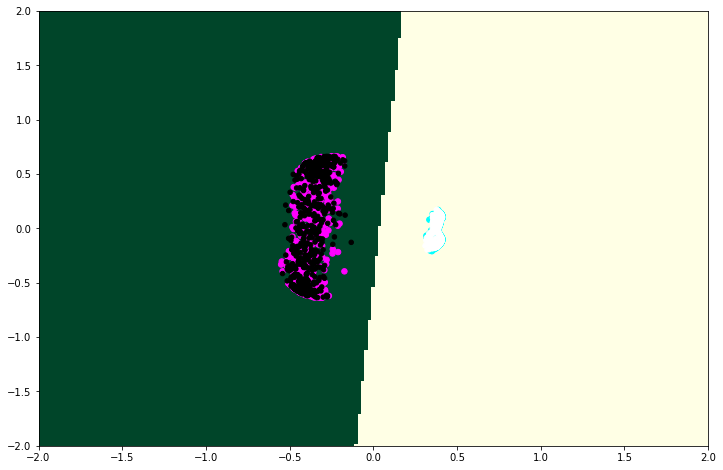

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 16 Train Acc: 1.000000  Test Acc: 1.000000


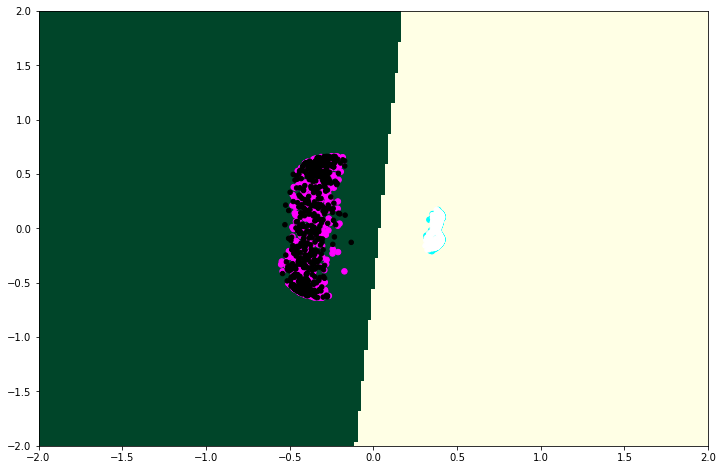

  32/1000 [..............................] - ETA: 0s sigmoid n_h: 32 Train Acc: 1.000000  Test Acc: 1.000000


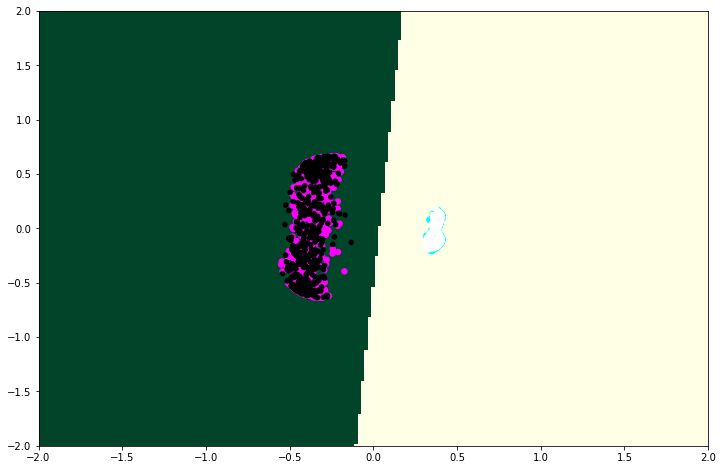

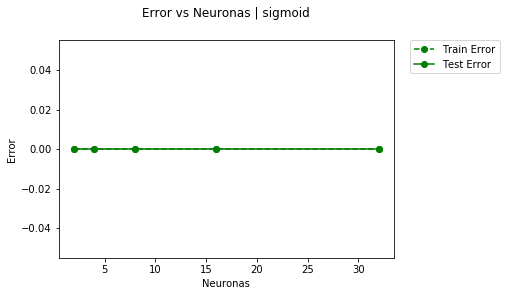

In [16]:
multiple_tree(clf, Xkpca_train, Y_train, Xkpca_test, Y_test, 'gini')
multiple_tree(clf, Xkpca_train, Y_train, Xkpca_test, Y_test, 'entropy')
one_layer(model, Xkpca_train, Y_train, Xkpca_test, Y_test, 'sigmoid')

#### Respuesta

Se observa que con métodos lineales, como árboles de clasificación se consiguen resultados ideales de forma inmediata. Se obtuvo un accuracy de 1, con el conjunto de test, por lo tanto númericamente los resultados son perfectos. Como experimento adicional se uso un red neuronal, que evidentemente separó las clases de forma correcta.

Lo anterior ocurre porque el kernel trick es aplicado al conjunto inicial, y luego se le aplico PCA para decidir cuales componentes eran más representativos de las clases. Una vez realizado esto, las dimensiones resultantes dejaron un espacio linealmente separable que permitió la diferenciación clara de los dos conjuntos.

Graficamente hablando se observan dos las dos clases claramente distinguibles, por lo que desde este punto de vista es evidente que la separación de clases puede ser realizada con cualquier máquina de aprendizaje.